In [56]:
from bs4 import BeautifulSoup

In [57]:
import requests

In [58]:
response = requests.get('https://www.airlinequality.com/airline-reviews/british-airways')

In [59]:
bAirways = response.text

In [60]:
soup = BeautifulSoup(bAirways, 'html.parser')

In [61]:
print(soup.title)

<title>British Airways Customer Reviews - SKYTRAX</title>


In [62]:
ratings = soup.find_all(name='div', itemprop='reviewRating')

for rate in ratings:
    print(int(rate.text.split('/')[0]))

9
7
1
1
1
1
1
5
1
1


In [63]:
review_dates = soup.find_all(name='h3', class_='text_sub_header userStatusWrapper')

for dates in review_dates:
    print(dates.text.split(')')[1])

 20th January 2025
 19th January 2025
 15th January 2025
 9th January 2025
 5th January 2025
 4th January 2025
 3rd January 2025
 1st January 2025
 17th December 2024
 17th December 2024


In [64]:
all_reviews = soup.find_all(name='div', class_='text_content')

for reviews in all_reviews:
    print(reviews.text)

Not Verified |  Very good flight following an equally good flight to Rome. Good food (especially on an evening flight) and aircraft early both ways. Just what short haul should be.
Not Verified |  An hour's delay due to late arrival of the incoming aircraft. The captain was a particularly able communicator who kept us in touch with the situation. We got freebie upgrades to emergency exit seats from a friendly member of the crew. In the end we were only 30 minutes behind schedule in a relatively comfortable elderly plane. Pretty stress free.
✅ Trip Verified |   I booked through BA because Loganair don’t have representatives in Manchester airport. Loganair cancelled the flight but someone at BA marked the flight as delayed by 52 minutes. I’ve spent over 70 days chasing BA’s complaints department who are at best totally ineffective. They won’t put you through to the people dealing with the claim (apparently they don’t have the facility to do so!), they won’t phone Loganair, they won’t loo

In [65]:
pages = 100
rates = []
reviews = []

for i in range(1, pages+1):
    
    print(f'Scrapping page {i}.....')
    
    url = f'https://www.airlinequality.com/airline-reviews/british-airways/page/{i}'
    
    response = requests.get(url)
    the_page = response.text
    
    soup = BeautifulSoup(the_page, 'html.parser')
    
    ratings = soup.find_all(name='div', itemprop='reviewRating')
    for rate in ratings:
        rates.append(int(rate.text.split('/')[0]))
        
    all_reviews = soup.find_all(name='div', class_='text_content')
    for review in all_reviews:
        reviews.append(review.text)
        
    print(f'    ------->Done with Page {i}')

Scrapping page 1.....
    ------->Done with Page 1
Scrapping page 2.....
    ------->Done with Page 2
Scrapping page 3.....
    ------->Done with Page 3
Scrapping page 4.....
    ------->Done with Page 4
Scrapping page 5.....
    ------->Done with Page 5
Scrapping page 6.....
    ------->Done with Page 6
Scrapping page 7.....
    ------->Done with Page 7
Scrapping page 8.....
    ------->Done with Page 8
Scrapping page 9.....
    ------->Done with Page 9
Scrapping page 10.....
    ------->Done with Page 10
Scrapping page 11.....
    ------->Done with Page 11
Scrapping page 12.....
    ------->Done with Page 12
Scrapping page 13.....
    ------->Done with Page 13
Scrapping page 14.....
    ------->Done with Page 14
Scrapping page 15.....
    ------->Done with Page 15
Scrapping page 16.....
    ------->Done with Page 16
Scrapping page 17.....
    ------->Done with Page 17
Scrapping page 18.....
    ------->Done with Page 18
Scrapping page 19.....
    ------->Done with Page 19
Scrapping p

In [66]:
import pandas as pd

data = {'Reviews':reviews, 'Ratings':rates}
df = pd.DataFrame(data=data)

df.head()

,Reviews,Ratings
0,Not Verified | Very good flight following an ...,9
1,Not Verified | An hour's delay due to late ar...,7
2,✅ Trip Verified | I booked through BA becaus...,1
3,✅ Trip Verified | British airways lost bags ...,1
4,✅ Trip Verified | The check in process and rew...,1


In [67]:
df.head()

,Reviews,Ratings
0,Not Verified | Very good flight following an ...,9
1,Not Verified | An hour's delay due to late ar...,7
2,✅ Trip Verified | I booked through BA becaus...,1
3,✅ Trip Verified | British airways lost bags ...,1
4,✅ Trip Verified | The check in process and rew...,1


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [69]:
df.isna().sum()

Reviews    0
Ratings    0
dtype: int64

In [70]:
blanks = []

for i, rat, rev in df.itertuples():
    if type(rev) == str:
        if rev.isspace():
            blanks.append(i)
            
print(blanks)

[]


In [71]:
df.head()

,Reviews,Ratings
0,Not Verified | Very good flight following an ...,9
1,Not Verified | An hour's delay due to late ar...,7
2,✅ Trip Verified | I booked through BA becaus...,1
3,✅ Trip Verified | British airways lost bags ...,1
4,✅ Trip Verified | The check in process and rew...,1


In [72]:
df['Reviews'] = df['Reviews'].apply(lambda review:review.split('|')[1])

df.head()

,Reviews,Ratings
0,Very good flight following an equally good f...,9
1,An hour's delay due to late arrival of the i...,7
2,I booked through BA because Loganair don’t ...,1
3,British airways lost bags in LHR then found...,1
4,The check in process and reward/loyalty progr...,1


In [73]:
sid = SentimentIntensityAnalyzer()

In [74]:
df['Sentiment_Ratings'] = df['Reviews'].apply(lambda revs: round(sid.polarity_scores(str(revs))['compound']*10))

In [75]:
df.head()

,Reviews,Ratings,Sentiment_Ratings
0,Very good flight following an equally good f...,9,9
1,An hour's delay due to late arrival of the i...,7,8
2,I booked through BA because Loganair don’t ...,1,4
3,British airways lost bags in LHR then found...,1,-7
4,The check in process and reward/loyalty progr...,1,-7


In [76]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=3, stop_words='english')

In [77]:
dtm = tfidf.fit_transform(df['Reviews'])

In [78]:
dtm

<1000x2978 sparse matrix of type '<class 'numpy.float64'>'
	with 53056 stored elements in Compressed Sparse Row format>

In [79]:
nmf_model = NMF(n_components=5, random_state=42)

In [80]:
nmf_model.fit(dtm)

NMF(n_components=5, random_state=42)

In [81]:
for index, topic in enumerate(nmf_model.components_):
    print(f'THE TOP 10 WORDS IN TOPIC {index}')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 10 WORDS IN TOPIC 0
['service', 'great', 'time', 'club', 'ba', 'flight', 'cabin', 'food', 'crew', 'good']


THE TOP 10 WORDS IN TOPIC 1
['booking', 'day', 'customer', 'told', 'voucher', 'booked', 'refund', 'cancelled', 'flight', 'ba']


THE TOP 10 WORDS IN TOPIC 2
['food', 'aisle', 'premium', 'middle', 'ba', 'seat', 'seats', 'economy', 'business', 'class']


THE TOP 10 WORDS IN TOPIC 3
['gate', 'hour', 'airport', 'hours', 'delayed', 'plane', 'minutes', 'check', 'luggage', 'flight']


THE TOP 10 WORDS IN TOPIC 4
['terrible', 'worst', 'fly', 'experience', 'airlines', 'airline', 'service', 'customer', 'airways', 'british']




In [82]:
topic_results = nmf_model.transform(dtm)

In [83]:
df['Topics'] = topic_results.argmax(axis=1)

df.head()

,Reviews,Ratings,Sentiment_Ratings,Topics
0,Very good flight following an equally good f...,9,9,0
1,An hour's delay due to late arrival of the i...,7,8,3
2,I booked through BA because Loganair don’t ...,1,4,1
3,British airways lost bags in LHR then found...,1,-7,4
4,The check in process and reward/loyalty progr...,1,-7,3


In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

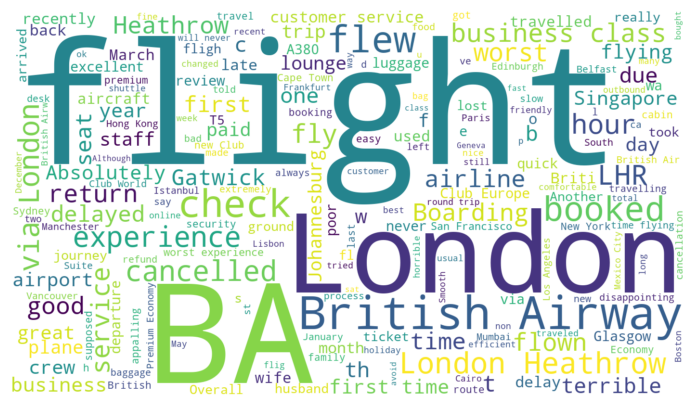

In [85]:
wcloud = WordCloud(height=800, width=1400, background_color='white').generate(df['Reviews'].to_string())

plt.figure(figsize=(10, 5))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [86]:
df.shape

(1000, 4)